# Google stock price analysis - 2004 - 2016

#### Resampling, Shifting, and Windowing

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools. The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

We will take a look at a few of those here, using some stock price data as an example. Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data. For example, the accompanying pandas-datareader package (installable via conda install pandas-datareader), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others. Here we will load Google's closing price history:

In [32]:
from pandas_datareader import data
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)

goog = data.DataReader("F", 'google', start, end)

goog.head()
#goog.iloc['2016-01-04']

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-10,12.35,12.38,12.10,12.12,24951437
2016-10-11,12.17,12.17,11.91,11.99,40053504
2016-10-12,12.00,12.01,11.94,11.96,20626954
2016-10-13,11.91,11.91,11.69,11.91,39904190
2016-10-14,11.96,12.00,11.89,11.91,25775674


In [33]:
goog = goog['Close'] # reduce volume of data, by using only close col

In [1]:
# Visualize

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog.plot();

NameError: name 'goog' is not defined

#### Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency. This can be done using the resample() method, or the much simpler asfreq() method. The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

eg: for 'BA' resample reports the average of the previous year, while asfreq reports the value at the end of the year.

    Alias	Description
    B	business day frequency
    C	custom business day frequency (experimental)
    D	calendar day frequency
    W	weekly frequency
    M	month end frequency
    SM	semi-month end frequency (15th and end of month)
    BM	business month end frequency
    CBM	custom business month end frequency
    MS	month start frequency
    SMS	semi-month start frequency (1st and 15th)
    BMS	business month start frequency
    CBMS	custom business month start frequency
    Q	quarter end frequency
    BQ	business quarter endfrequency
    QS	quarter start frequency
    BQS	business quarter start frequency
    A	year end frequency
    BA	business year end frequency
    AS	year start frequency
    BAS	business year start frequency
    BH	business hour frequency
    H	hourly frequency
    T, min	minutely frequency
    S	secondly frequency
    L, ms	milliseconds
    U, us	microseconds
    N	nanoseconds
    
Taking a look at the Google closing price, let's compare what the two return when we down-sample the data. Here we will resample the data by month: 

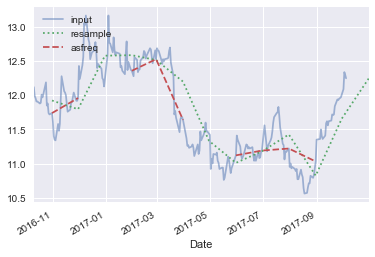

In [42]:
goog.plot(alpha=0.5, style='-')
goog.resample('M').mean().plot(style=':')
goog.asfreq('M').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

For up-sampling, resample() and asfreq() are largely equivalent, though resample has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. Just as with the pd.fillna() function discussed previously, asfreq() accepts a method argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends):

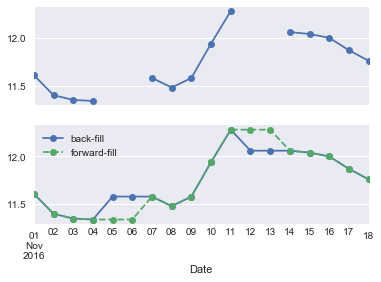

In [53]:
fig, ax = plt.subplots(2, sharex = True)
data = goog.iloc[16:30]

data.asfreq('D').plot(ax = ax[0], marker = 'o') # plots days with weekends as gaps

# upsamples weekends with backward and forward fill methods

data.asfreq('D', method = 'bfill').plot(ax = ax[1], style = '-o') 
data.asfreq('D', method = 'ffill').plot(ax = ax[1], style = '--o')
ax[1].legend(['back-fill','forward-fill']);

The top panel is the default: non-business days are left as NA values and do not appear on the plot. The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.